In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib import rc, rcParams
import scipy
import re

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
df = pd.read_csv("parameters.csv")#, header=None)
df = df.set_index('Parameter')

In [3]:
df

,WASP-17b,WASP-39b,HAT-P-26b,HAT-P-32b
Parameter,,,,
T_0,1630.8614881350509+0.00026684631575335516-0.00...,2702.3957973500133+0.0003718749835570634-0.000...,2670.424173554393+0.0008781483138591284-0.0009...,2883.6177900335633+0.00011862964129250031-0.00...
RpRs,0.12217592094892667+0.0005177504782353098-0.00...,0.14149026038025142+0.0012659907267314197-0.00...,0.0727840928103202+0.001963566097598249-0.0026...,0.1495977792227567+0.00020492931499896394-0.00...
P,3.735484553218816+0.00000184-0.00000182,4.054861395226134+0.0001998695909275483-0.0002...,4.2343900775565935+0.000354263518044462-0.0003...,2.149984832035263+0.00001701-1.692152449939143...
i,87.30852050543098+0.39644874320137546-0.446981...,88.49241205142391+0.5464367800084631-0.7526854...,87.41595086559371+1.5393319612684024-1.7007207...,89.51307084813853+0.4541524196908284-0.3370493...
a/R*,7.115132869990389+0.12153948281163807-0.123589...,12.056556882534395+0.487974056149481-0.4686394...,11.592504364704151+1.5751304667490036-1.397120...,6.0277563430964864+0.03765612820454667-0.03502...
e,---,---,0.12116828485016282+0.05722449180824006-0.0573...,0.015686429867747265+0.008247418786619793-0.00...
sigma,0.0005494388244872845+0.00003614-0.00004188,0.0011290750648156583+0.0002740331871066556-0....,0.00016801101926346246+0.00003399-0.00003398,0.0007847154829236353+0.00008914-0.00011703217...
rho,0.19517484193733126+0.023188086236041294-0.028...,1.47932138724324+0.48585198588824985-0.8306401...,0.11912357198489529+0.047907160668278936-0.240...,0.5295657120072492+0.06476360063362813-0.08134...
colour,#2ca02c,#d62728,#ff7f0e,#9467bd


In [4]:
df_ref_list = df.columns

df_T_0_list = df.loc['T_0']
df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
# df_R_list = df.loc['R'] #Planetary radius row
# df_a_list = df.loc['a'] #Semi-major axis row
# df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
# df_w_list = df.loc['w'] #
df_color = df.loc['colour'] #Colours
# df_T_c_list = df.loc['T_c']
# df_transit_duration_list = df.loc['transit_duration']
df_a_Rs_list = df.loc['a/R*']
df_sigma_list = df.loc['sigma']
df_rho_list = df.loc['rho']

T_0_list, T_0_ref_list = read_df_params(df_T_0_list, df_ref_list)
e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
# R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
# a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
# b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)
# T_c_list, T_c_ref_list = read_df_params(df_T_c_list, df_ref_list)
# transit_duration_list, transit_duration_ref_list = read_df_params(df_transit_duration_list, df_ref_list)
a_Rs_list, a_Rs_ref_list = read_df_params(df_a_Rs_list, df_ref_list)
sigma_list, sigma_ref_list = read_df_params(df_sigma_list, df_ref_list)
rho_list, rho_ref_list = read_df_params(df_rho_list, df_ref_list)

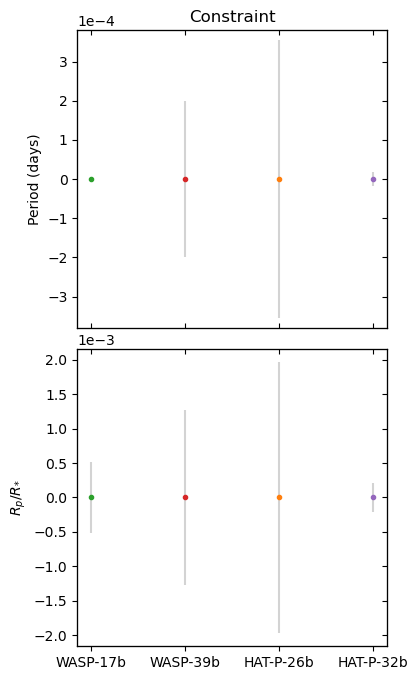

In [5]:
y_list = range(0, len(P_ref_list))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4,8))

"""
Period
"""
ax1.set_title("Constraint")

for obj, author, y in zip(P_list, P_ref_list, y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    colour = df[author]['colour']
    ax1.errorbar(y, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")

ax1.set_ylim(-0.00038, 0.00038)

ax1.set_ylabel(r"Period (days)")

ax1.set_xticklabels([])
ax1.tick_params(axis="x", which="both", direction="in")

# Mirror y
ax1y = ax1.twinx()
ax1y.set_ylim(ax1.get_ylim())
ax1y.get_yaxis().set_ticklabels([])
ax1y.tick_params(which="both", direction="in")

# Mirror x
ax1x = ax1.twiny()
ax1x.set_xlim(ax1.get_xlim())
ax1x.get_xaxis().set_ticklabels([])
ax1x.tick_params(which="both", direction="in")

# ax1x.set_xlabel("Planet")


"""
RpRs
"""

for obj, author, y in zip(RpRs_list, RpRs_ref_list, y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    colour = df[author]['colour']
    ax2.errorbar(y, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
# plt.xlim(-0.005, 0.005)

ax2.set_ylabel(r"$R_{p}/R_{*}$")

ax2.set_xticklabels([])

# Mirror y
ax2y = ax2.twinx()
ax2y.set_ylim(ax2.get_ylim())
ax2y.get_yaxis().set_ticklabels([])
ax2y.tick_params(which="both", direction="in")

# Mirror x
ax2x = ax2.twiny()
ax2x.set_xlim(ax2.get_xlim())
ax2x.get_xaxis().set_ticklabels([])
ax2x.tick_params(which="both", direction="in")



# yticklabels = ([r'{:.4f}'.format(i) for i in ax1.get_yticks()])
# yticklabels[4] = u"\u03bc"
# ax1.set_yticklabels(yticklabels)
ax1.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax2.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))

ax1.set_xticks(y_list)
ax1x.set_xticks(y_list)
ax2.set_xticks(y_list)
ax2x.set_xticks(y_list)
ax2.set_xticklabels(df_ref_list)



# ax.legend()
# fig.tight_layout()
plt.subplots_adjust(hspace=0.07)
plt.show()

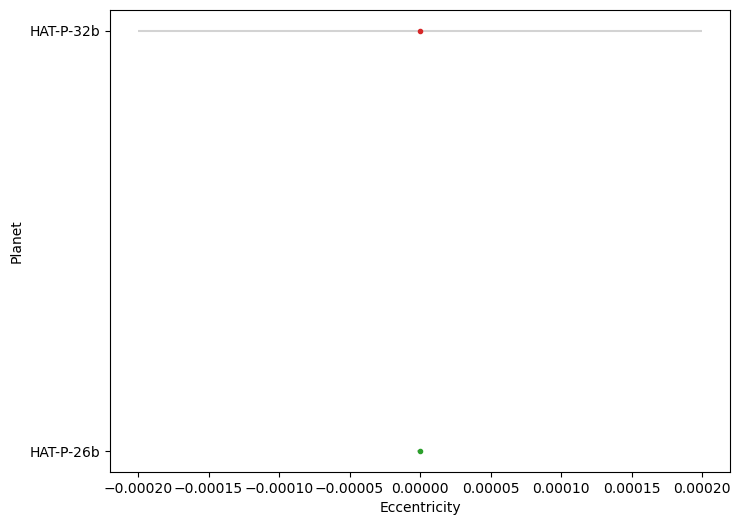

In [6]:
y_list = range(0, len(e_ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

for obj, author, y in zip(P_list, P_ref_list, y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    colour = df[author]['colour']
    plt.errorbar(0, y, xerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
# plt.xlim(-0.005, 0.005)
plt.xlabel(r"Eccentricity")
plt.ylabel("Planet")

ax.set_yticks(y_list)
ax.set_yticklabels(e_ref_list)

# ax.legend()
plt.show()


WASP-17b 1630.8614881350509 0.00026684631575335516 23.055521681089886
WASP-39b 2702.3957973500133 0.0003718749835570634 32.12999857933028
HAT-P-26b 2670.424173554393 0.0008781483138591284 75.8720143174287
HAT-P-32b 2883.6177900335633 0.00011862964129250031 10.249601007672027


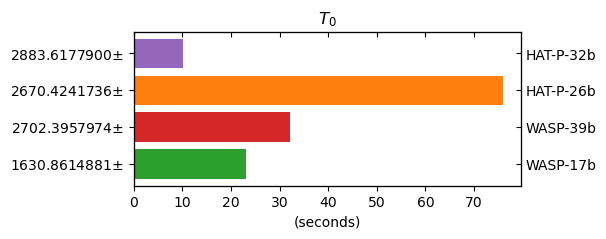

In [22]:
y_list = range(0, len(T_0_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
ax.set_title(r'$T_{0}$')
for obj, author, y in zip(T_0_list, T_0_ref_list, y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower)) * 86400
    colour = df[author]['colour']
    print(author, mu, max(abs(upper), abs(lower)), sigma)
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.7f$\pm$" % (mu)
    labels_with_mu.append(label)


ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel('(seconds)')
# ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
# ax.set_xscale('log')
ax.get_xaxis().set_major_formatter(tck.ScalarFormatter())


# ax.text(-2, -1.7, "Time - 2457000 (BTJD days)")

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
# axx.set_xscale('log')

axx.get_xaxis().set_ticklabels([])

axy.set_yticks(y_list, labels=P_ref_list)


plt.show()

WASP-17b 3.735484553218816 1.84e-06 0.158976
WASP-39b 4.054861395226134 0.0001998695909275483 17.268732656140173
HAT-P-26b 4.2343900775565935 0.000354263518044462 30.608367959041516
HAT-P-32b 2.149984832035263 1.701e-05 1.469664


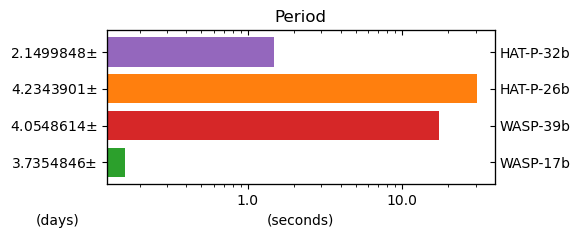

In [8]:
y_list = range(0, len(P_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
ax.set_title('Period')
for obj, author, y in zip(P_list, P_ref_list, y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower)) * 86400
    colour = df[author]['colour']
    print(author, mu, max(abs(upper), abs(lower)), sigma)
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.7f$\pm$" % (mu)
    labels_with_mu.append(label)


ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel('(seconds)')
# ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
ax.set_xscale('log')
ax.get_xaxis().set_major_formatter(tck.ScalarFormatter())


ax.text(0.042, -1.7, "(days)")

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.set_xscale('log')

axx.get_xaxis().set_ticklabels([])

axy.set_yticks(y_list, labels=P_ref_list)


plt.show()

WASP-17b 0.12217592094892667 0.0005177504782353098
WASP-39b 0.14149026038025142 0.0012659907267314197
HAT-P-26b 0.0727840928103202 0.001963566097598249
HAT-P-32b 0.1495977792227567 0.00020492931499896394


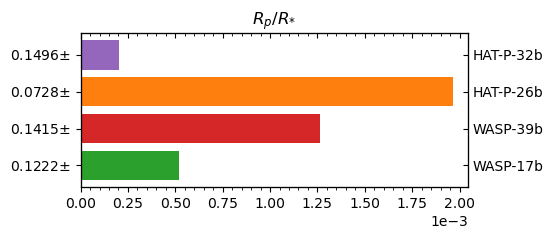

In [9]:
fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
ax.set_title(r'$R_{p}/R_{*}$')
for obj, author, y in zip(RpRs_list, RpRs_ref_list, y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    colour = df[author]['colour']
    print(author, mu, sigma)
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.4f$\pm$" % (mu)
    labels_with_mu.append(label)

ax.set_xlim(0, 0.002045)

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.get_xaxis().set_ticklabels([])
axx.tick_params(which="both", direction="in")

ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel('')
ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
# ax.set_xscale('log')
# ax.get_xaxis().set_major_formatter(tck.ScalarFormatter())
axy.set_yticks(y_list, labels=RpRs_ref_list)

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())


plt.show()

WASP-17b 87.30852050543098 0.39644874320137546
WASP-39b 88.49241205142391 0.5464367800084631
HAT-P-26b 87.41595086559371 1.5393319612684024
HAT-P-32b 89.51307084813853 0.4541524196908284


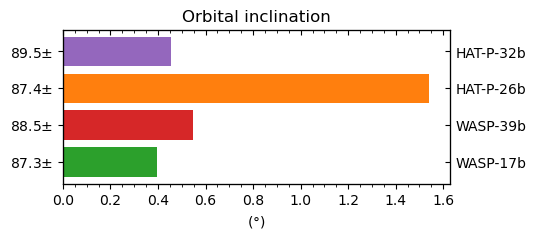

In [10]:
fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
ax.set_title(r'Orbital inclination')
for obj, author, y in zip(i_list, i_ref_list, y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    colour = df[author]['colour']
    print(author, mu, sigma)
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.1f$\pm$" % (mu)
    labels_with_mu.append(label)

ax.set_xlim(0, 1.63)

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.get_xaxis().set_ticklabels([])
axx.tick_params(which="both", direction="in")

ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel(r'($\degree$)')
ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
# ax.set_xscale('log')
axy.set_yticks(y_list, labels=i_ref_list)

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())


plt.show()

WASP-17b 7.115132869990389 0.12153948281163807
WASP-39b 12.056556882534395 0.487974056149481
HAT-P-26b 11.592504364704151 1.5751304667490036
HAT-P-32b 6.0277563430964864 0.03765612820454667


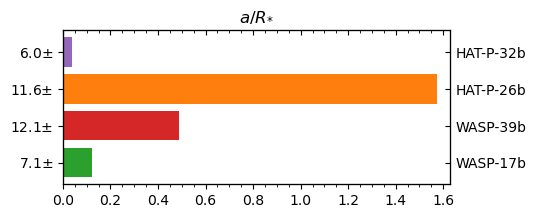

In [11]:
fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
ax.set_title(r'$a/R_{*}$')
for obj, author, y in zip(a_Rs_list, a_Rs_ref_list, y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    colour = df[author]['colour']
    print(author, mu, sigma)
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.1f$\pm$" % (mu)
    labels_with_mu.append(label)

ax.set_xlim(0, 1.63)

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.get_xaxis().set_ticklabels([])
axx.tick_params(which="both", direction="in")

ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel(r'')
ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
# ax.set_xscale('log')
axy.set_yticks(y_list, labels=i_ref_list)

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())


plt.show()

HAT-P-26b 0.12116828485016282 0.05722449180824006
HAT-P-32b 0.015686429867747265 0.008247418786619793


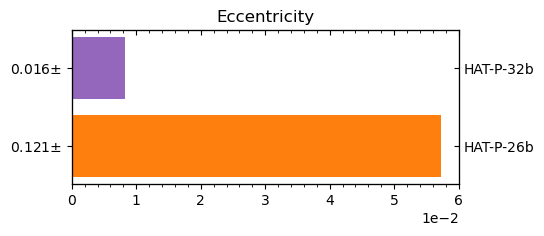

In [12]:
y_list = range(0, len(e_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2)) 

labels_with_mu = []
ax.set_title(r'Eccentricity')
for obj, author, y in zip(e_list, e_ref_list, y_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    colour = df[author]['colour']
    print(author, mu, sigma)
    ax.barh(y, sigma, color=colour, align='center')
    label = r"%.3f$\pm$" % (mu)
    labels_with_mu.append(label)

# ax.set_xlim(0, 1.63)

# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.get_xaxis().set_ticklabels([])
axx.tick_params(which="both", direction="in")

ax.set_yticks(y_list, labels=labels_with_mu)
ax.set_xlabel(r'')
ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
# ax.set_xscale('log')
axy.set_yticks(y_list, labels=e_ref_list)

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
axx.xaxis.set_minor_locator(tck.AutoMinorLocator())


plt.show()